#### MODELO CASUAL  

In [52]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import math 

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns

# Gráficos
# ==============================================================================
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Asunciones y Preprocesamiento
# ==============================================================================
from scipy import stats
import math
from scipy.stats import levene
import researchpy as rp
from sklearn.preprocessing import StandardScaler
import itertools

# ANOVA
# ==============================================================================
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.multivariate.manova import MANOVA

#Linear Regresion con Sklearn
# ==============================================================================
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from scipy.special import boxcox, inv_boxcox # Invertir el Box-Cox

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Tamaño gráficas
# ==============================================================================
plt.rcParams["figure.figsize"] = (10,8)

from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, StandardScaler,OneHotEncoder


##### En este jupiter buscaremos predecir los clientes `casuales`.
 <font color = 'sky blue'>- Buscaremos con qué variebles se pueden predecir mejor.
 - Hay que ver las métricas (R², RMSE...)

In [3]:
df= pd.read_csv("Bicicletas_limpio.csv", index_col = 0)
df.head(2)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801


In [4]:
del df['dteday']

In [5]:
numericas = df.select_dtypes(include = ['int64', 'float64'])
numericas.head()

,instant,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### <font color = 'sky blue'>  Antes realizaremos un EDA para conocer mejor nuestro dataset.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   season      730 non-null    object 
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 91.2+ KB


<font color = 'orange'> Vemos que tenemos datos de tipo integer, float y 1 object.

In [38]:
df.duplicated().sum()

0

<font color = 'orange'> No tenemos elementos duplicados

In [39]:
df.shape

(730, 15)

<font color = 'orange'> Nuestro dataset está formado por 730 filas (dos años de datos) y 15 columnas.

In [40]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,730.0,365.500000,210.877136,1.000000,183.250000,365.500000,547.750000,730.000000
yr,730.0,0.500000,0.500343,0.000000,0.000000,0.500000,1.000000,1.000000
mnth,730.0,6.526027,3.450215,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,730.0,0.028767,0.167266,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,730.0,2.997260,2.006161,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,730.0,0.683562,0.465405,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,730.0,1.394521,0.544807,1.000000,1.000000,1.000000,2.000000,3.000000
temp,730.0,20.319259,7.506729,2.424346,13.811885,20.465826,26.880615,35.328347
atemp,730.0,23.726322,8.150308,3.953480,16.889713,24.368225,30.445775,42.044800
hum,730.0,62.765175,14.237589,0.000000,52.000000,62.625000,72.989575,97.250000


<font color = 'orange'> En este describe podemos ver el recuento de valores que tenemos con sus medias, máximos, minimos...

In [41]:
df.describe(include = 'object').T

,count,unique,top,freq
season,730,4,autumn,188


<font color = 'orange'> Examinamos nuestra variable de tipo object 'Season' (que más tarde codificaremos para trabajar con ella).

In [42]:
df.describe(exclude = 'object').T

,count,mean,std,min,25%,50%,75%,max
instant,730.0,365.500000,210.877136,1.000000,183.250000,365.500000,547.750000,730.000000
yr,730.0,0.500000,0.500343,0.000000,0.000000,0.500000,1.000000,1.000000
mnth,730.0,6.526027,3.450215,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,730.0,0.028767,0.167266,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,730.0,2.997260,2.006161,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,730.0,0.683562,0.465405,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,730.0,1.394521,0.544807,1.000000,1.000000,1.000000,2.000000,3.000000
temp,730.0,20.319259,7.506729,2.424346,13.811885,20.465826,26.880615,35.328347
atemp,730.0,23.726322,8.150308,3.953480,16.889713,24.368225,30.445775,42.044800
hum,730.0,62.765175,14.237589,0.000000,52.000000,62.625000,72.989575,97.250000


<font color = 'orange'> Y en este describe podemos examinar el resto de variables sin 'Season'.

### <font color = 'sky blue'> Vamos a ver nuestros Outliers

<font color = 'orange'> Comenzamos definiendo las variables numéricas

In [43]:
numericas = df.select_dtypes(include = ['int64', 'float64'])
numericas.head()

,instant,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,16.397820,654,985
1,2,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,11.472437,670,801
2,3,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,11.076035,1229,1349
3,4,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,10.613970,1454,1562
4,5,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,9.475537,1518,1600


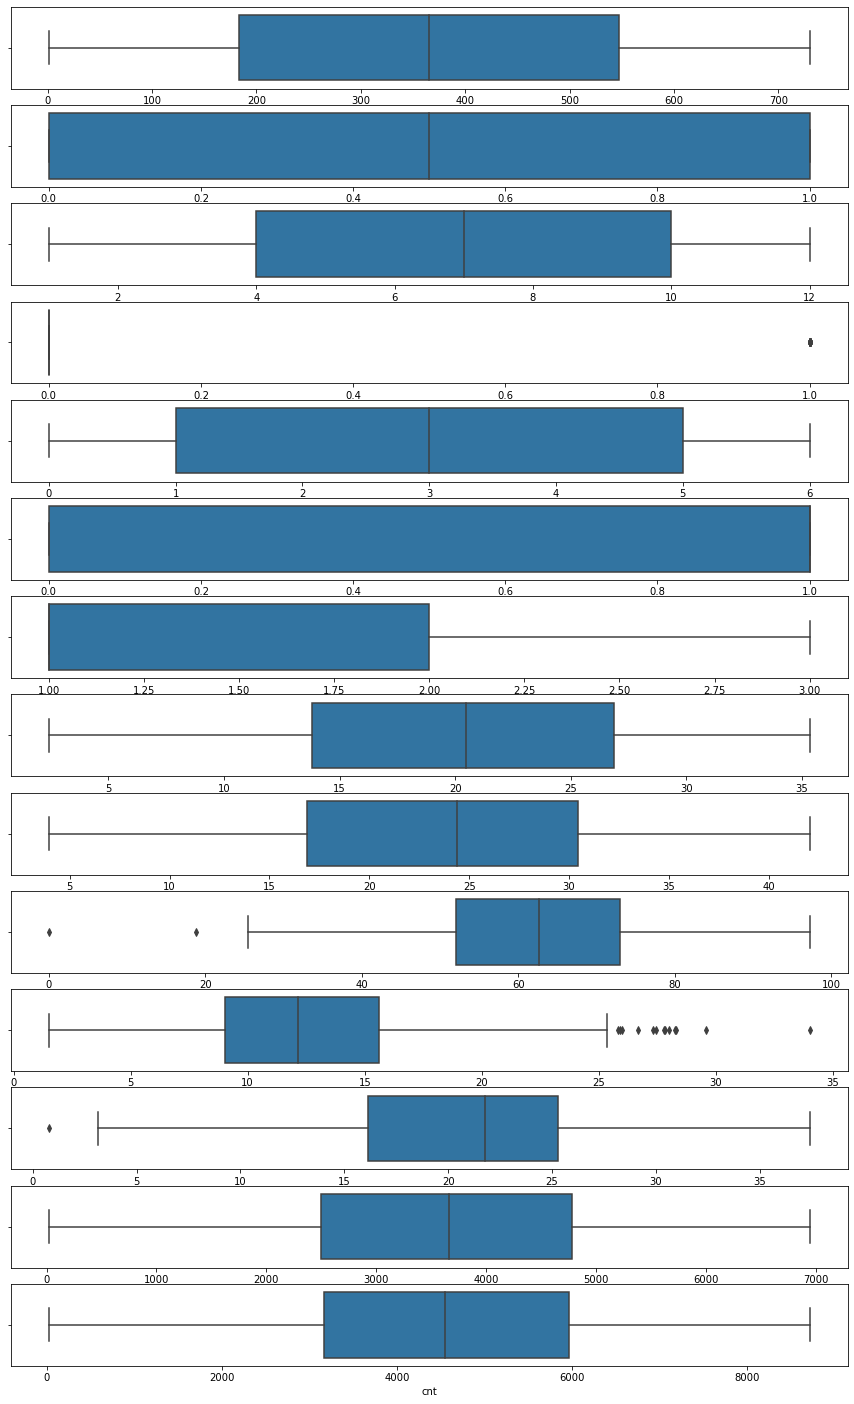

In [45]:
fig, axes = plt.subplots(14, 1, figsize = (15, 25))

for i, col in enumerate(numericas.columns):
    sns.boxplot(x = numericas.columns[i], data = df, ax = axes[i])

    plt.show;

<font color = 'orange'> - Observamos outliers en las variables de **hum, windspeed y casual**. Pero decidimos no reemplazarlos ya que podria darnos información sobre por ejemplo, los días con más viento, si afecta o no al alquiler de bicis. LOs outliers en casual también son informativos ya que veremos que días han alquilado más bicis personas que no están registradas.

### <font color = 'sky blue'> Elegimos como nuestra ***variable respuesta 'casual'***, queremos saber que relación tienen las demás variables

### Variable respuesta

In [7]:
casuales = df['casual']
casuales.shape[0]

730

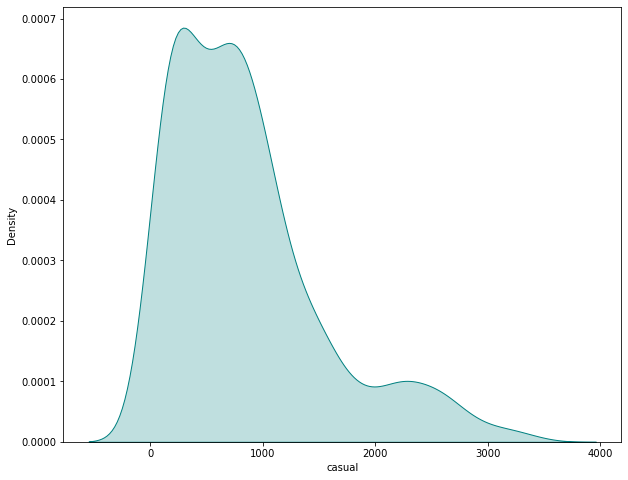

In [8]:
sns.distplot(df.casual, 
            hist = False, 
            color = 'teal', 
            kde_kws = {'shade':True, 'linewidth':1});

### Variables predictoras

In [9]:
columnas_numericas = df.select_dtypes(include = np.number).columns
columnas_numericas = columnas_numericas.drop('casual')

In [10]:
len(columnas_numericas)

13

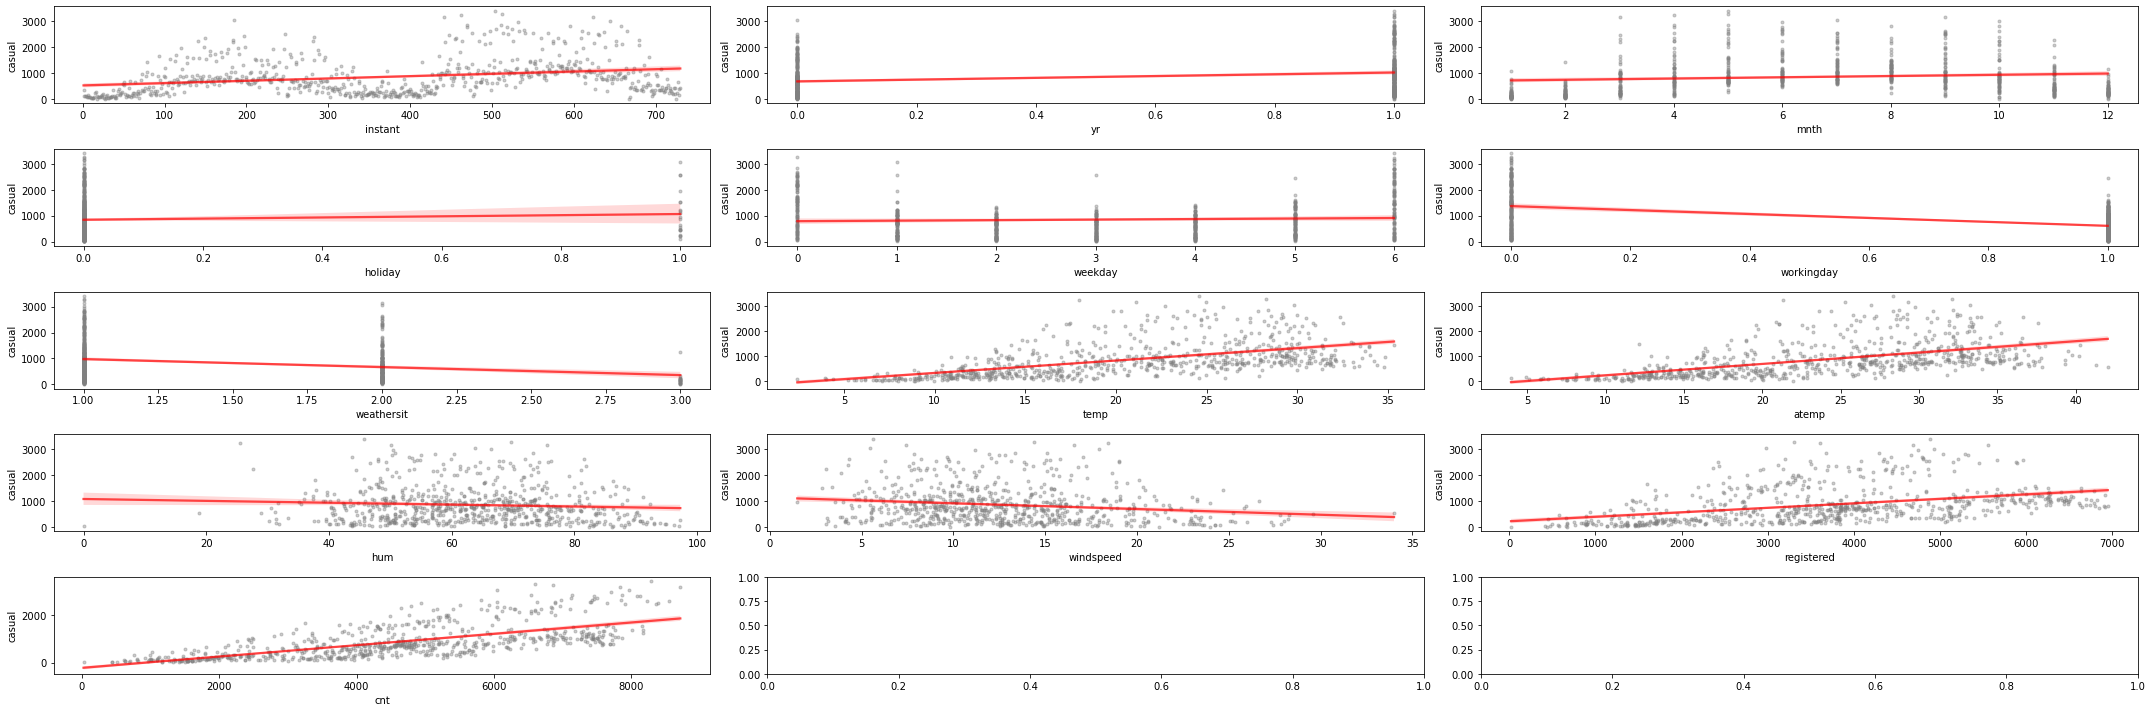

In [11]:
fig, axes = plt.subplots(5, 3, figsize = (30, 10))

axes = axes.flat

for i, col in enumerate(columnas_numericas):
    sns.regplot(
        x = df[col],
        y = df['casual'],
        color = 'gray',
        marker = '.',

        scatter_kws = {'alpha': 0.4},
        line_kws = {'color':'red','alpha':0.7},
        ax = axes[i])

fig.tight_layout();


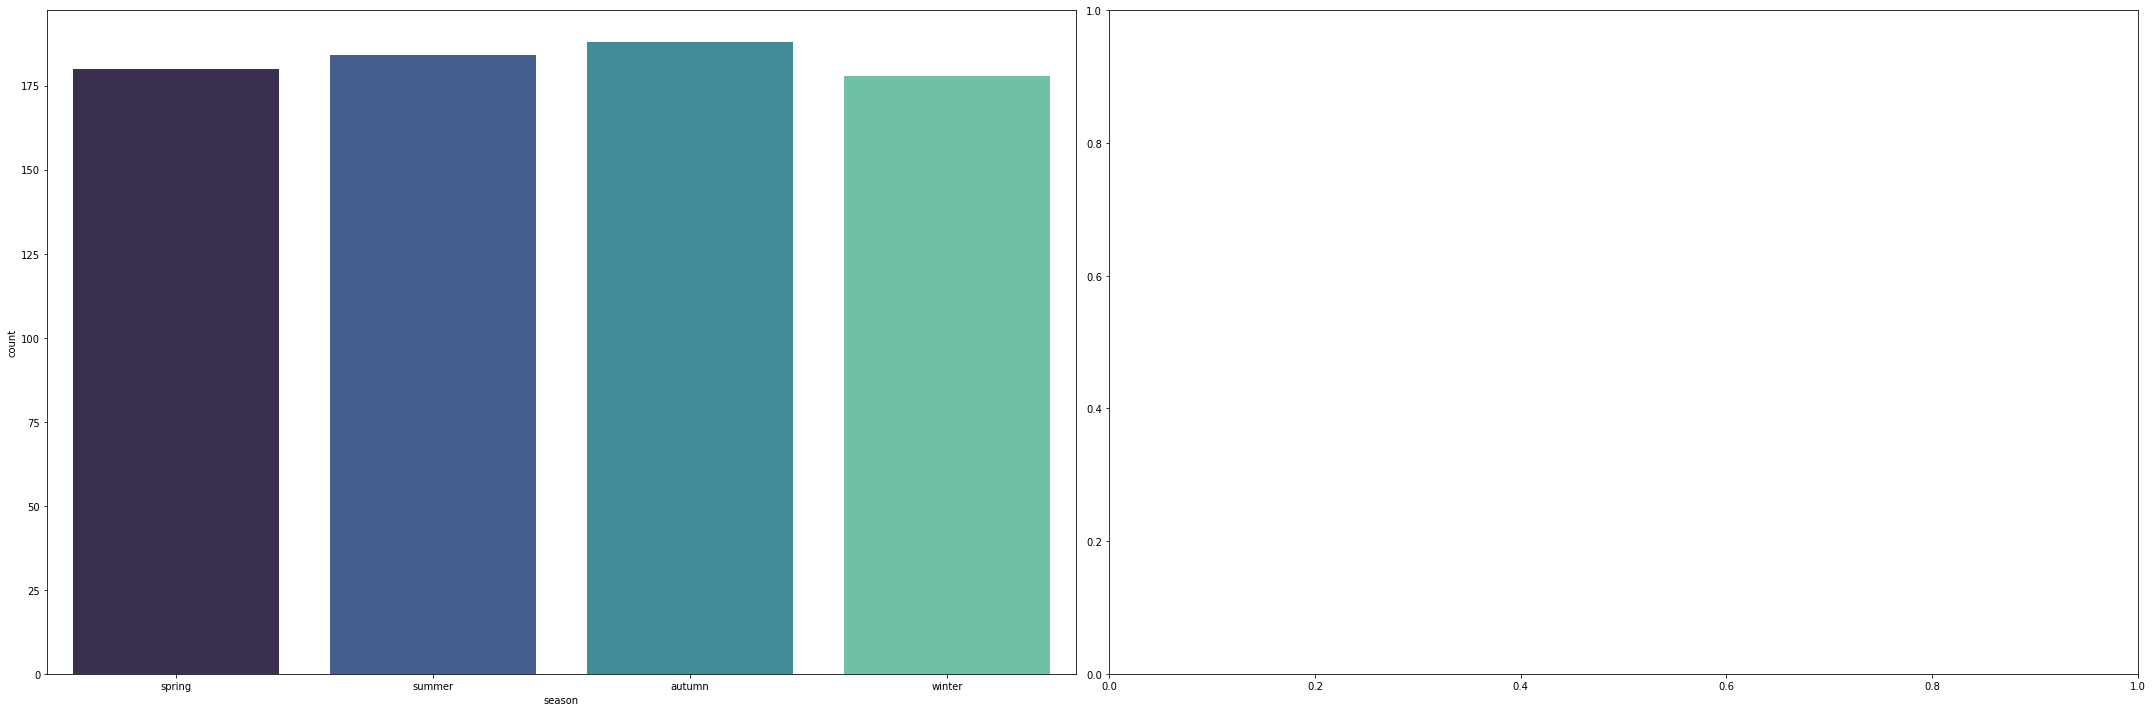

In [12]:
fig, axes = plt.subplots(1, 2, figsize = (30, 10))
axes = axes.flat

columnas_object = df.select_dtypes(include = 'object').columns

for i, col, in enumerate(columnas_object):
    sns.countplot(df[col], ax = axes[i], palette = 'mako')

fig.tight_layout();

In [13]:
numericas.head()

,instant,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


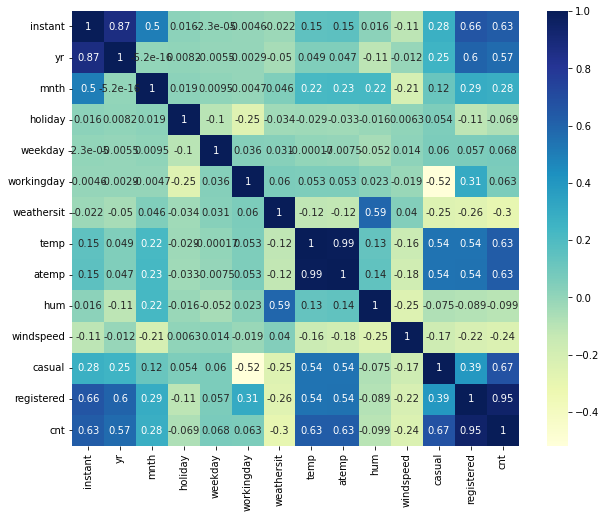

In [14]:
sns.heatmap(numericas.corr(), cmap = 'YlGnBu', annot = True);

| Test Shappiro | Resultado | Conclusión | 
|---|---|---| 
| p-value > 0.05 | No significativo | Datos normales| 
|p-value < 0.05| Significativo| Datos NO normales |

In [15]:
stats.shapiro(df['casual'])

ShapiroResult(statistic=0.8850967288017273, pvalue=7.660028716313278e-23)

In [16]:
df['casual'], lambda_ajustada = stats.boxcox(df['casual'])

In [17]:
stats.shapiro(df['casual'])

ShapiroResult(statistic=0.9915913939476013, pvalue=0.000365116517059505)

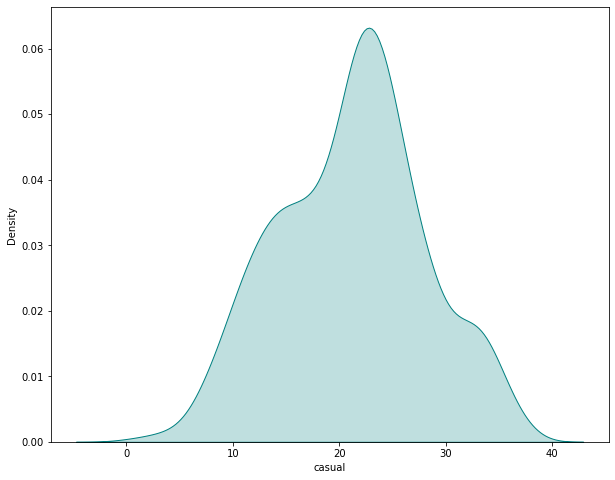

In [18]:
sns.distplot(df.casual, 
            hist = False, 
            color = 'teal', 
            kde_kws = {'shade':True, 'linewidth':1});

<font color = 'sky blue'> Después de aplicar Shappiro vemos que nuestros datos continúan no siendo normales, aunque han mejorado bastante.

## Homocedasticidad

| Test Levene | Resultado | Conclusión | 
|---|---|---| 
| p-value > 0.05 | No significativo | Cumple asunción, tienen varianzas similares| 
|p-value < 0.05| Significativo| No cumple asunción, no tienen varianzas similares | 

#### Variable categórica ---> `season`

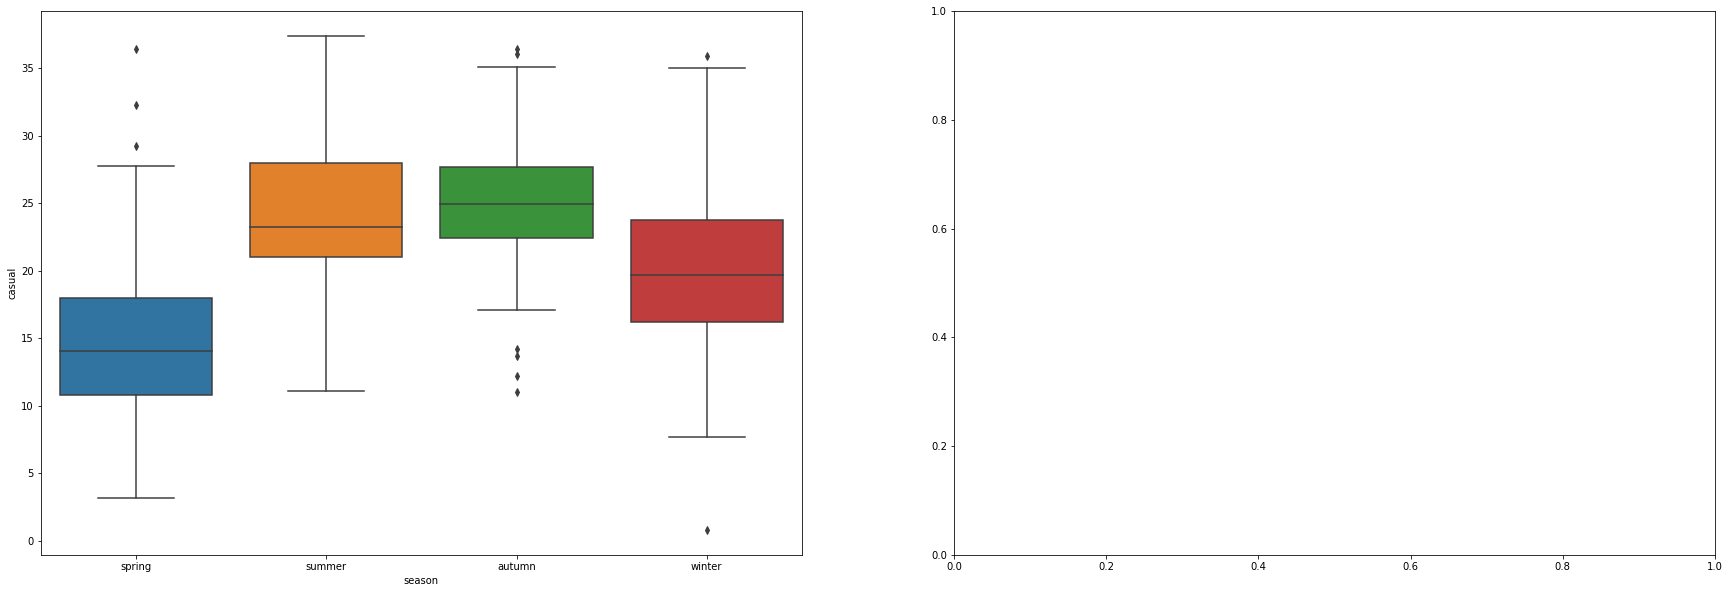

In [19]:
fig, axes = plt.subplots(1, 2, figsize = (30, 10))
axes = axes.flat
colum_cat = df.select_dtypes(include = ['object', 'category']).columns

for i, col in enumerate(colum_cat):
    sns.boxplot(
        x = col,
        y = 'casual',
        data = df,
        palette = 'tab10',
        ax = axes[i]
    );

<font color = 'sky blue'> No deberíamos incluir la variable `season` ya que no es homogénea y no nos funcionaría bien en una regresión lineal.

In [20]:
def datos_test_levene(columna, df): 
    valores = df[columna].unique() 
    d = {} 
    for x in valores: 
        d[x] = df[df[columna] == x]["casual"] 
    return d 

In [21]:
df.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,16.397820,654,985
1,2,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,11.472437,670,801
2,3,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,11.076035,1229,1349
3,4,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,10.613970,1454,1562
4,5,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,9.475537,1518,1600


In [22]:
year = datos_test_levene('yr', df)
month = datos_test_levene('mnth', df)
holiday = datos_test_levene('holiday', df)
weekday = datos_test_levene('weekday', df)
workingday = datos_test_levene('workingday', df)
weathersit = datos_test_levene('weathersit', df)
temp = datos_test_levene('temp', df)
atemp = datos_test_levene('atemp', df)
hum = datos_test_levene('hum', df)
windspeed = datos_test_levene('windspeed', df)

In [23]:
stats.levene(year[0], year[1], center = 'median')

LeveneResult(statistic=0.00038911699024988215, pvalue=0.9842673161397686)

In [24]:
stats.levene(month[1], month[2], month[3], month[4], month[5], month[6], month[7], month[8], month[9], month[10], month[11], 
             month[12],center = 'median')

LeveneResult(statistic=3.7580384153400903, pvalue=3.004622270635963e-05)

In [25]:
stats.levene(holiday[0], holiday[1], center = 'median')

LeveneResult(statistic=0.32762284478790343, pvalue=0.5672389204600601)

In [26]:
stats.levene(weekday[1], weekday[2], weekday[3], weekday[4], weekday[5], weekday[6], center = 'median')

LeveneResult(statistic=3.2809580240805385, pvalue=0.006216439561824791)

In [27]:
stats.levene(workingday[0], workingday[1], center = 'median')

LeveneResult(statistic=22.546964498741172, pvalue=2.4700156312323087e-06)

In [28]:
stats.levene(weathersit[1], weathersit[2], weathersit[3], center = 'median')

LeveneResult(statistic=2.1855697071831948, pvalue=0.1131517456948248)

<font color = 'sky blue'> Vemos en el p valor que `year`, `holiday` y `weathersit` tienen varianzas iguales por lo que podremos usarlas para nestro modelo. Hay que hacer bins para `temp`, `atemp`, `hum` y `windspeed` para poder hacerles levene porque es imposible si no ( el for podría valer pero no me sale con ese diccionario)

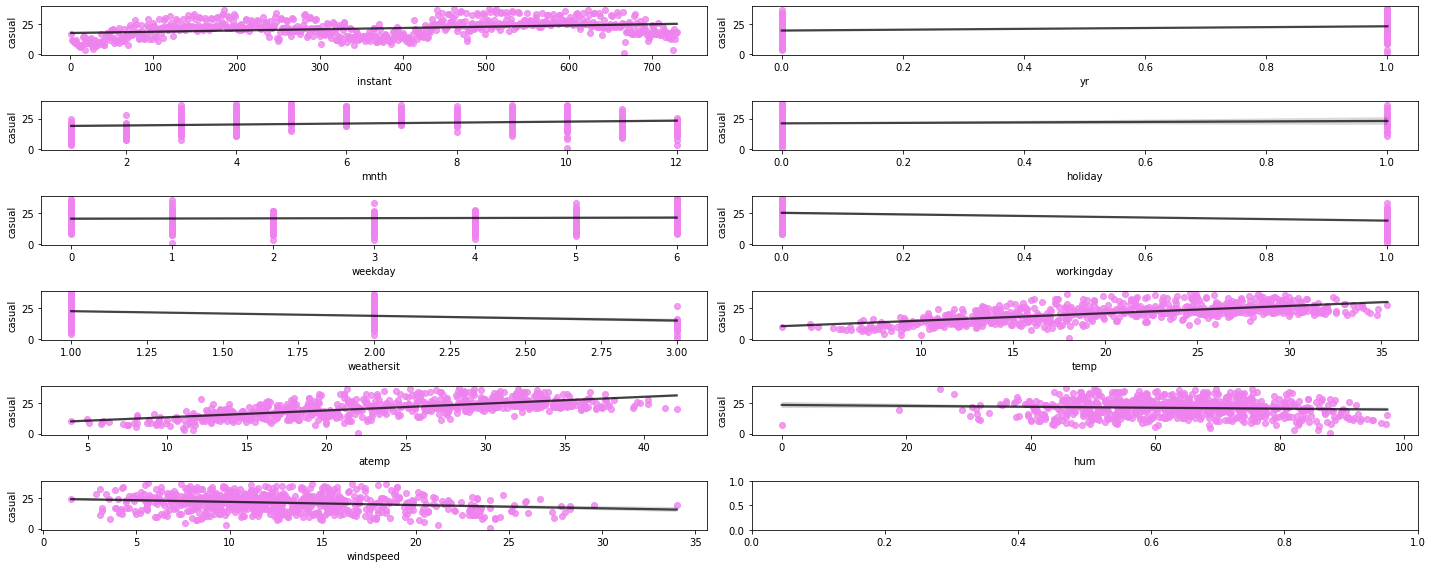

In [32]:
fig, axes = plt.subplots(nrows = 6, ncols = 2, figsize = (20, 8)) 

# definimos una lista de colores. Cada color corresponderá a una gráfica 
lista_colores = ["cadetblue", "seagreen"] 
 
axes = axes.flat 

# seleccionamos las columnas que queremos graficar 
columnas_numeric = df.select_dtypes(include = np.number).drop(['casual', 'registered', 'cnt'], axis=1) 
columnas_numeric = columnas_numeric.columns 

for i, colum in enumerate(columnas_numeric): 
    sns.regplot( 
        data = df, 
        x = colum, 
        y = 'casual', 
        color = 'violet', 
        line_kws = {"color": "black", "alpha": 0.7 }, 
        ax = axes[i]) 

fig.tight_layout(); 

<font color = 'sky blue'> Parece que hay homocedasticidad en atemp, temp, hum y windspeed.

In [33]:
resultados = {}

numer = numericas.columns.drop(['casual', 'registered', 'cnt', 'instant'])

for col in numer:
    stats, p_value = levene(df[col], df.casual, center = 'median')

    resultados[col] = p_value

In [34]:
resultados

{'yr': 8.018725365858655e-174,
 'mnth': 4.2314563376598296e-47,
 'holiday': 9.57281502299451e-199,
 'weekday': 8.915628105831126e-106,
 'workingday': 6.949282664184961e-182,
 'weathersit': 3.859216573548085e-177,
 'temp': 5.833319378367082e-07,
 'atemp': 4.953287402796698e-12,
 'hum': 8.60376546170806e-66,
 'windspeed': 6.605233869387679e-13}

<font color = 'sky blue'> Según estos datos, ninguno es homocedástico 

## INDEPENDENCIA (CHI²)

| Test Independencia | Resultado | Conclusión | 
|---|---|---| 
| p-value > 0.05 | No significativo | Cumple asunción, tienen varianzas similares| 
|p-value < 0.05| Significativo| No cumple asunción, no tienen varianzas similares | 

In [35]:
columnas = df.columns
columnas

Index(['instant', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [36]:
combinaciones = list(itertools.combinations(columnas,2))
combinaciones

[('instant', 'season'),
 ('instant', 'yr'),
 ('instant', 'mnth'),
 ('instant', 'holiday'),
 ('instant', 'weekday'),
 ('instant', 'workingday'),
 ('instant', 'weathersit'),
 ('instant', 'temp'),
 ('instant', 'atemp'),
 ('instant', 'hum'),
 ('instant', 'windspeed'),
 ('instant', 'casual'),
 ('instant', 'registered'),
 ('instant', 'cnt'),
 ('season', 'yr'),
 ('season', 'mnth'),
 ('season', 'holiday'),
 ('season', 'weekday'),
 ('season', 'workingday'),
 ('season', 'weathersit'),
 ('season', 'temp'),
 ('season', 'atemp'),
 ('season', 'hum'),
 ('season', 'windspeed'),
 ('season', 'casual'),
 ('season', 'registered'),
 ('season', 'cnt'),
 ('yr', 'mnth'),
 ('yr', 'holiday'),
 ('yr', 'weekday'),
 ('yr', 'workingday'),
 ('yr', 'weathersit'),
 ('yr', 'temp'),
 ('yr', 'atemp'),
 ('yr', 'hum'),
 ('yr', 'windspeed'),
 ('yr', 'casual'),
 ('yr', 'registered'),
 ('yr', 'cnt'),
 ('mnth', 'holiday'),
 ('mnth', 'weekday'),
 ('mnth', 'workingday'),
 ('mnth', 'weathersit'),
 ('mnth', 'temp'),
 ('mnth', 'ate

In [51]:
for par in combinaciones:
    crosstab, test_result, expecte = rp.crosstab(df[par[0]], 
                                                 df[par[1]], 
                                                 test = 'chi-square', 
                                                 expected_freqs = True, 
                                                 prop = 'cell')
    print('----------', par[0], par[1],'------------')
    print(test_result)

---------- instant season ------------
                   Chi-square test    results
0  Pearson Chi-square ( 2187.0) =   2190.0000
1                       p-value =      0.4779
2                    Cramer's V =      1.0000
---------- instant yr ------------
                  Chi-square test   results
0  Pearson Chi-square ( 729.0) =   730.0000
1                      p-value =     0.4826
2                   Cramer's V =     1.0000
---------- instant mnth ------------
                   Chi-square test    results
0  Pearson Chi-square ( 8019.0) =   8030.0000
1                       p-value =      0.4633
2                    Cramer's V =      1.0000
---------- instant holiday ------------
                  Chi-square test   results
0  Pearson Chi-square ( 729.0) =   730.0000
1                      p-value =     0.4826
2                   Cramer's V =     1.0000
---------- instant weekday ------------
                   Chi-square test    results
0  Pearson Chi-square ( 4374.0) =   4380.00

<font color = 'sky blue'> Las combinaciones de variables dependientes son:
 - season + mnth
 - season + temp
 - mnth + temp
 - holiday + weekday
 - holiday + workingday
 - weekday + workingday
 - temp + hum
 - temp + windspeed

## ANOVA

In [53]:
ls = ols('casual ~ season + mnth + temp + holiday + weekday + workingday + hum + windspeed', data = df).fit()
sm.stats.anova_lm(ls)


,df,sum_sq,mean_sq,F,PR(>F)
season,3.0,12670.372426,4223.457475,358.788271,2.219216e-142
mnth,1.0,11.316219,11.316219,0.961328,3.271824e-01
temp,1.0,3665.728361,3665.728361,311.408448,3.540277e-58
holiday,1.0,171.743652,171.743652,14.589849,1.451755e-04
weekday,1.0,91.798650,91.798650,7.798416,5.368160e-03
workingday,1.0,7528.060804,7528.060804,639.518672,1.964739e-101
hum,1.0,1159.201760,1159.201760,98.475715,7.727328e-22
windspeed,1.0,705.358205,705.358205,59.921108,3.354008e-14
Residual,719.0,8463.671124,11.771448,NaN,NaN


In [54]:
ls.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 casual   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     220.9
Date:                Sun, 26 Jun 2022   Prob (F-statistic):          1.34e-211
Time:                        18:41:36   Log-Likelihood:                -1930.3
No. Observations:                 730   AIC:                             3883.
Df Residuals:                     719   BIC:                             3933.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           21.1865      1.251     16.941      0.000      18.731      23.642
season[T.spring]    -0.6077      0.692     -0.878      0.380      -1.966       0.751
season[T.summer]     3.1938      0.459      6.959      0.000       2.293       4.095
season[T.winter]     1.9028      0.548      3.473      0.001       0.827       2.979
mnth                 0.0624      0.068      0.915      0.361      -0.072       0.196
temp                 0.5983      0.031     19.599      0.000       0.538       0.658
holiday             -2.0323      0.791     -2.571      0.010      -3.584      -0.480
weekday              0.1624      0.064      2.544      0.011       0.037       0.288
workingday          -7.1329      0.283    -25.219      0.000      -7.688      -6.578
hum                 -0.1071      0.009    -11.310      0.000      -0.126      -0.088
windspeed           -0.2002      0.026     -7.741      0.000      -0.251      -0.149
==============================================================================
Omnibus:                       20.914   Durbin-Watson:                   0.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.186
Skew:                          -0.231   Prob(JB):                     6.22e-08
Kurtosis:                       3.937   Cond. No.                         765.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<font color = 'sky blue'> En la tabla de arriba miramos 'coef'. Es el coeficiente de esos datos. En el intercept nos dice de donde parte la línea en la gráfica.
Lo que sale debajo nos dice la inclinación por cada categoría. 

## REALIZAMOS EL MODELO DE REGRESIÓN

<font color = 'sky blue'> Recordamos que esta regresión es para `casual` con las variables que antes vimos que tenían un p valor buenete.

<font color = 'sky blue'>
Hacemos el map para season. Recordamos que es nuestra única variable de tipo object.

In [55]:
mapa_season = {"spring": 0,"summer": 1, "autumn": 2, "winter": 3} 
df["season"] = df["season"].map(mapa_season)

In [57]:
X = df.drop(['casual', 'registered', 'cnt'], axis =1)
y = df[['casual']]

In [58]:
X.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,1,0,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882
1,2,0,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113
2,3,0,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703
3,4,0,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832
4,5,0,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300


In [59]:
y.head()

,casual
0,16.397820
1,11.472437
2,11.076035
3,10.613970
4,9.475537


In [60]:
X_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [61]:
X_train.shape

(584, 12)

In [62]:
x_test.shape

(146, 12)

In [63]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [64]:
y_pred_test = pd.DataFrame(lr.predict(x_test))
y_pred_test.head()

,0
0,29.583353
1,26.307610
2,21.160208
3,14.185576
4,25.091023


In [65]:
y_pred_test['reales'] = y_test

In [66]:
y_pred_test

,0,reales
0,29.583353,NaN
1,26.307610,NaN
2,21.160208,11.076035
3,14.185576,NaN
4,25.091023,NaN
...,...,...
141,14.658922,NaN
142,15.889423,NaN
143,31.371966,NaN
144,19.330373,NaN


In [67]:
y_pred_test = lr.predict(x_test)
y_pred_train = lr.predict(X_train)

In [68]:
def metricas(y_test, y_train, y_test_pred, y_train_pred): 
    resultados = {'MAE': [metrics.mean_absolute_error(y_test, y_test_pred), 
                          metrics.mean_absolute_error(y_train, y_train_pred)], 
                  'MSE': [metrics.mean_squared_error(y_test, y_test_pred), 
                          metrics.mean_squared_error(y_train, y_train_pred)], 
                  'RMSE': [np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)), 
                           np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))], 
                  'R2': [metrics.r2_score(y_test, y_test_pred), 
                         metrics.r2_score(y_train, y_train_pred)], "set": ["test", "train"]} 
    df = pd.DataFrame(resultados) 
    return df 

In [69]:
results = metricas(y_test, y_train, y_pred_test, y_pred_train)
results

,MAE,MSE,RMSE,R2,set
0,2.645407,14.070736,3.751098,0.707381,test
1,2.501852,11.035039,3.321903,0.764843,train


<font color = 'sky blue'>El R² es 0,7 que no es mal resultado, lo que indica un buen ajuste lineal. Los valores de MAE y RMSE son bajos por lo que el margen de error de las predicciones es bajo.

In [70]:
X.tail()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
725,726,0,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911
726,727,0,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557
727,728,0,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661
728,729,0,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518
729,730,0,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682


<font color = 'orange'> Vamos a introducir datos meteorológicos para probar nuestro modelo.

In [71]:
modelito = {'instant': [528], 'season': [2], 'yr':[2], 'mnth':[8], 'holiday':[1], 
            'workingday':[1],'weekday':[4], 'weathersit':[1], 'temp':[38], 'atemp':[45], 
            'hum':[30], 'windspeed':[10]}

In [72]:
modelo = pd.DataFrame(modelito)

In [73]:
modelo.head()

,instant,season,yr,mnth,holiday,workingday,weekday,weathersit,temp,atemp,hum,windspeed
0,528,2,2,8,1,1,4,1,38,45,30,10


In [74]:
lr.predict(modelo)

array([[25.1393893]])

In [75]:
inv_boxcox(3.32, lambda_ajustada)

9.758214622558642

<font color = 'sky blue'> Para un día como ese nuestros clientes casuales nos van a alquilar 25 bicletas, margen de error de 9.75.
Esta predicción funciona con valores altos, pero no es tan precisa para predicciones bajas, por lo que todavía hay que trabajar en nuestro modelo. Pero para las predicciones altas lo podemos empezar a poner en práctica y analizar resultados.

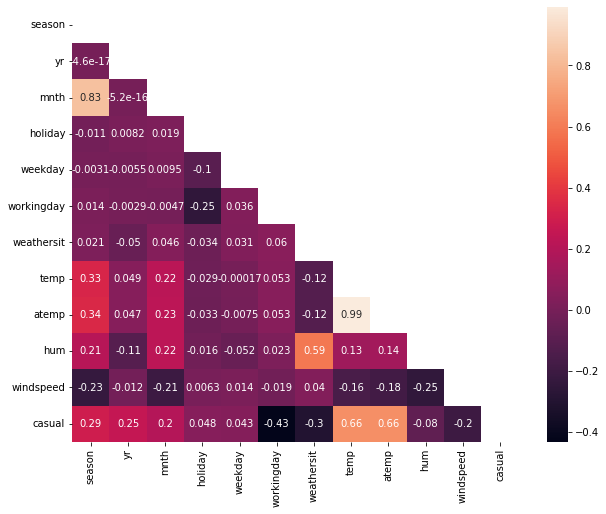

In [ ]:
fig, ax = plt.subplots(figsize = (10,8))
corr = df.drop(columns = ['registered','cnt', 'instant']).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr,mask = mask,xticklabels=corr.columns.values,yticklabels=corr.columns.values, annot= True );